# Análisis exploratorio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("puntos_muestreo_fake.csv")

In [3]:
df.head()

,id,index_right,USO_TIERRA,USO,SUBUSO,ESTRUCTURA,COBERTURA,ALTURA,TIPO_FORES,SUBTIPOFOR,...,cummulative_greenness,eft,minimum_greenness,season_length,seasonal_variation,elevation,slope,aspect,ndvi_l8,ndvi_s2
0,326,83,BOSQUE NATIVO RENOVAL DENSO,BOSQUE,NATIVO,RENOVAL,DENSO,2 - 4,ESCLEROFILO,PEUMO QUILLAY LITRE,...,2.473292,4.0,0.201404,64.0,0.067362,1478.424194,5.404997,281.401978,0.460007,0.477864
1,294,207,ESTEPA ANDINA CENTRAL,PRADERAS Y MATORRALES,PRADERAS,ESTEPA ANDINA CENTRAL,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,1.579932,2.0,-0.000664,120.0,0.126237,2018.506714,26.281919,294.844177,0.242522,0.217458
2,677,205,MATORRAL ARBORESCENTE MUY ABIERTO,PRADERAS Y MATORRALES,MATORRAL ARBORESCENTE,NO APLICA,MUY ABIERTO,NO APLICA,NO APLICA,NO APLICA,...,NaN,NaN,NaN,NaN,NaN,2334.262451,34.002857,351.091125,0.220055,0.193798
3,512,215,BOSQUE NATIVO RENOVAL MUY ABIERTO,BOSQUE,NATIVO,RENOVAL,MUY ABIERTO,2 - 4,ESCLEROFILO,PEUMO QUILLAY LITRE,...,2.268631,4.0,0.151841,80.0,0.068544,1398.141235,25.082346,328.001862,0.321700,0.252781
4,1019,203,AFLORAMIENTOS ROCOSOS,AREAS DESPROVISTAS DE VEGETACION,AFLORAMIENTOS ROCOSOS,NO APLICA,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,NaN,NaN,NaN,NaN,NaN,2717.321777,37.424358,249.630508,0.093971,0.035170


## Subset de datos

Primero, mirar qué valores únicos hay disponibles:

In [4]:
df.USO.drop_duplicates()

0                               BOSQUE
1                PRADERAS Y MATORRALES
4     AREAS DESPROVISTAS DE VEGETACION
17                           HUMEDALES
Name: USO, dtype: object

Seleccionar los valores únicos que quiero y guardarlo en un dataframe nuevo llamado `df2`

In [5]:
df2 = df.loc[df['USO'].isin(["BOSQUE", "HUMEDALES"])]

Revisando que esté todo bien seleccionado:

In [6]:
df2.USO.drop_duplicates()

0        BOSQUE
17    HUMEDALES
Name: USO, dtype: object

Si quieren usar esta selección, recuerden cambiar las siguientes líneas que tengan `df`, por `df2`.

## Estadísticas básicas sobre campos numéricos

In [7]:
df.describe()

,id,index_right,cummulative_greenness,eft,minimum_greenness,season_length,seasonal_variation,elevation,slope,aspect,ndvi_l8,ndvi_s2
count,120.000000,120.000000,73.000000,72.000000,73.000000,73.000000,73.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,556.725000,164.275000,2.269953,2.208333,0.111934,88.657534,0.091304,1961.265918,28.412164,222.904105,0.247082,0.221477
std,291.230076,62.197836,0.468705,1.423520,0.057315,21.817564,0.040244,514.999753,9.056548,104.741083,0.108951,0.121098
min,61.000000,4.000000,1.186463,1.000000,-0.066100,48.000000,0.021921,909.734985,4.162750,6.063538,0.058717,0.020501
25%,319.500000,117.750000,1.953835,1.000000,0.073158,72.000000,0.061750,1566.724304,22.913270,183.231133,0.146201,0.112082
50%,514.500000,203.000000,2.348799,1.000000,0.119805,88.000000,0.087718,1897.999146,29.796582,248.903023,0.264212,0.221358
75%,777.000000,205.000000,2.583239,4.000000,0.161764,96.000000,0.114713,2401.176147,34.900392,303.042694,0.325876,0.297361
max,1172.000000,221.000000,3.272917,5.000000,0.201404,160.000000,0.205738,3086.757080,49.217510,358.524384,0.471268,0.482517


array([[<Axes: title={'center': 'ndvi_l8'}>,
        <Axes: title={'center': 'ndvi_s2'}>]], dtype=object)

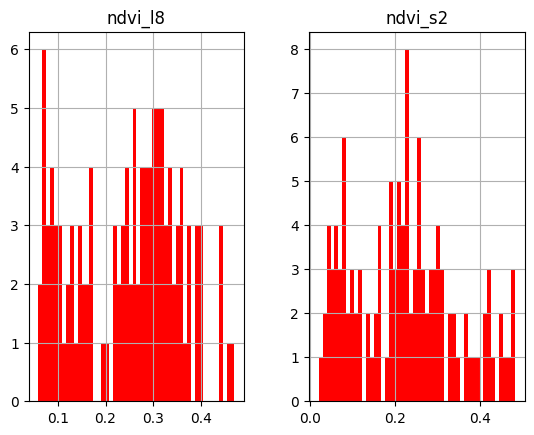

In [8]:
df[["ndvi_l8", "ndvi_s2"]].hist(bins=50, alpha=1, color="red")

<Axes: ylabel='Frequency'>

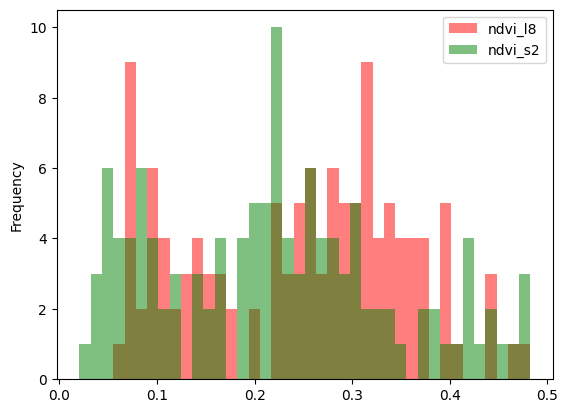

In [9]:
df[["ndvi_l8", "ndvi_s2"]].plot.hist(bins=40, alpha=.5, color=["red", "green"])

## Boxplot

<Axes: xlabel='cummulative_greenness'>

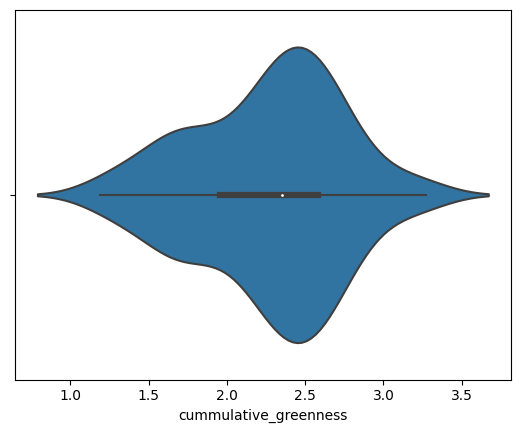

In [10]:
sns.violinplot(data=df, x="cummulative_greenness")

<Axes: ylabel='cummulative_greenness'>

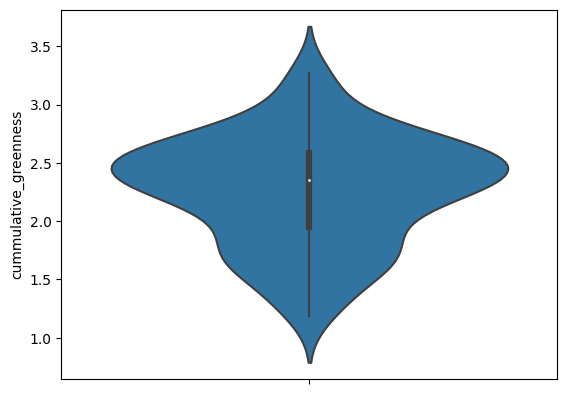

In [11]:
sns.violinplot(data=df, y="cummulative_greenness")

<Axes: xlabel='eft', ylabel='cummulative_greenness'>

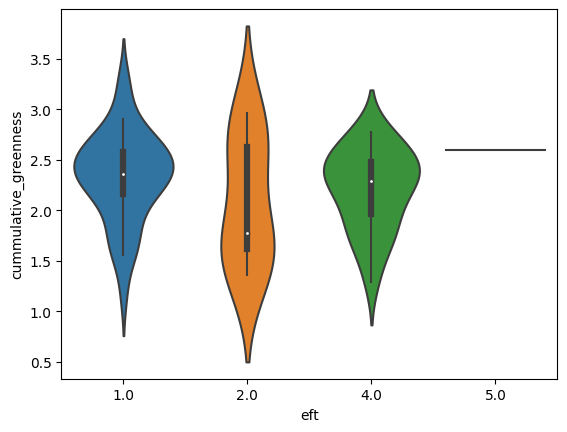

In [12]:
sns.violinplot(data=df, x="eft", y="cummulative_greenness")

In [ ]:
plt.figure(figsize=(20,5))
sns.violinplot(data=df, x="eft", y="cummulative_greenness", hue="USO")

<Axes: xlabel='eft', ylabel='cummulative_greenness'>

In [ ]:
plt.figure(figsize=(20,5))
sns.violinplot(data=df, x="COBERTURA", y="cummulative_greenness", hue="USO")

## Scatterplot y correlación

In [ ]:
sns.jointplot(data=df, x="slope", y="ndvi_s2")

In [ ]:
stats.pearsonr(df.slope, df.ndvi_s2)

In [ ]:
stats.spearmanr(df.slope, df.ndvi_s2)

In [ ]:
stats.kendalltau(df.slope, df.ndvi_s2)